<a href="https://colab.research.google.com/github/carlosfab/escola-data-science/blob/master/notebooks/Aula_001_S%C3%A9ries_Temporais_(Time_Series)_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Séries Temporais (Time Series)

Notebook de apoio para a **Aula 001: Time Series (Séries Temporais) - Parte 1**

### 1. Como importar Time Series em Python

In [ ]:
# importar pacotes e setar configurações de plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline

In [ ]:
# url do dataset
dataset_path = "https://raw.githubusercontent.com/inaepmachado/DataSet/master/Electric_Production.csv"

# importar o csv para um dataframe
df = pd.read_csv(dataset_path)

# ver as 5 primeiras entradas
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [ ]:
# [ANTES] converter tipo da coluna DATE em datetime mm-dd-yyyy
print("[Tipo de variável 'DATE' ANTES de converter]")
display(df.DATE.head())

[Tipo de variável 'DATE' ANTES de converter]


0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [ ]:
# [DEPOIS] converter tipo da coluna DATE em datetime mm-dd-yyyy
print("[Tipo de variável 'DATE' DEPOIS de converter em datetime]")
display(pd.to_datetime(df.DATE, format="%m-%d-%Y").head())

# Y: ano com 4 dígitos || y: ano com 2 dígitos

[Tipo de variável 'DATE' DEPOIS de converter em datetime]


0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [ ]:
# converter DATE para datetime e associar ao index do dataframe
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# eliminar a coluna DATE: a variável DATE já se tornou o índica do dataframe, sendo desnecessário existir como variável também
df.drop("DATE", axis=1, inplace=True)

# ver as primeiras 5 entradas
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


### 2. Visualizar Séries Temporais

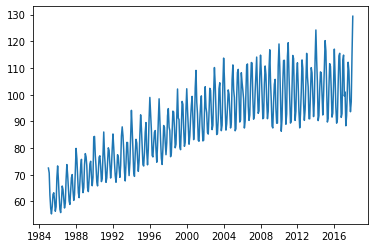

In [ ]:
# plotar gráfico de consumo de eletricidade: plot (X = index, Y = valor)
plt.plot(df.index, df.Value);

O consumo de eletricidade possui uma tendência crescente, parecendo estar mais estabilizado em 2016.

### 3. Como decompor uma Time Series em seus componentes

É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componentes.

A biblioteca `stats`
from statsmodels.tsa.seasonal import seasonal_decompose


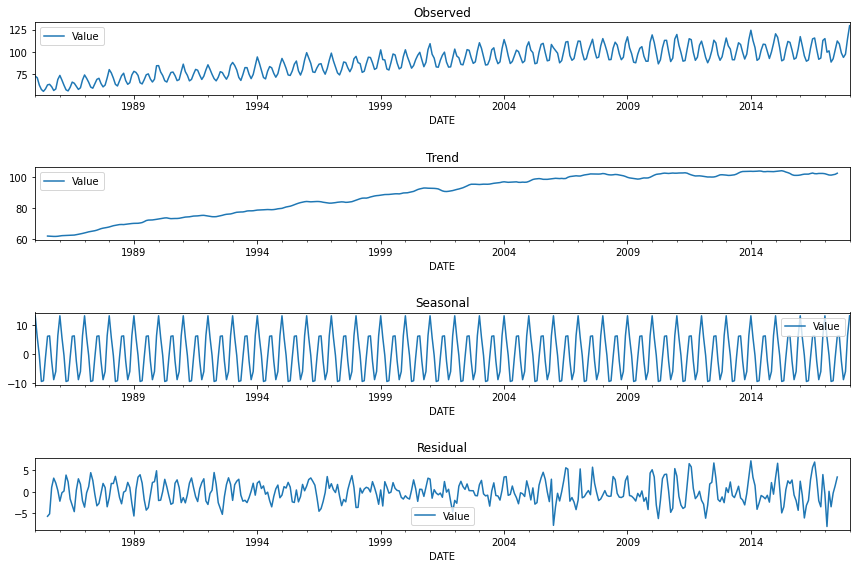

In [ ]:
# salvar a decomposicao em result
result = seasonal_decompose(df)

# plotar a decomposicao em tamanho normal
#result.plot();

# plotar a decomposição em tamanho customizado maior
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
ax1.set_title("Observed")
result.observed.plot(ax=ax1)
ax2.set_title("\nTrend")
result.trend.plot(ax=ax2)
ax3.set_title("\nSeasonal")
result.seasonal.plot(ax=ax3)
ax4.set_title("\nResidual")
result.resid.plot(ax=ax4)
plt.tight_layout()

### 4. Análise Exploratória e Extração de Features

Usaremos um *dataset* contendo os dados de uma suposta companhia ferroviária que utiliza uma nova tecnologia de propulsão.


In [ ]:
ferroviaria_dataset = "https://raw.githubusercontent.com/inaepmachado/DataSet/master/trem.csv"

# importar os dados da empresa ferroviária
df_trem = pd.read_csv(ferroviaria_dataset)

# ver as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


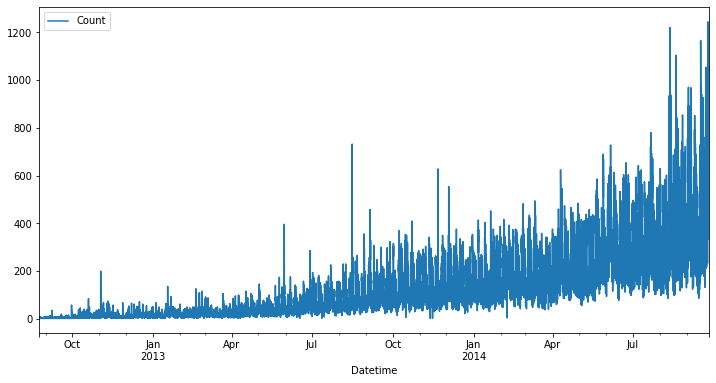

In [ ]:
# converter a coluna Datetime em tipo datetime; 
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

# plotar gráfico
fig, ax = plt.subplots(figsize=(12,6))
# como o dataframe tem várias colunas/variáveis, preciso informar o que vai em cada eixo
df_trem.plot(x='Datetime', y='Count', ax=ax);

In [ ]:
# converter DATE para datetime e associar ao index do dataframe
df_trem.index = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

# eliminar a coluna DATE: a variável DATE já se tornou o índica do dataframe, sendo desnecessário existir como variável também
df_trem.drop("Datetime", axis=1, inplace=True)
df_trem.drop("ID", axis=1, inplace=True)

# ver as primeiras 5 entradas
df_trem.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


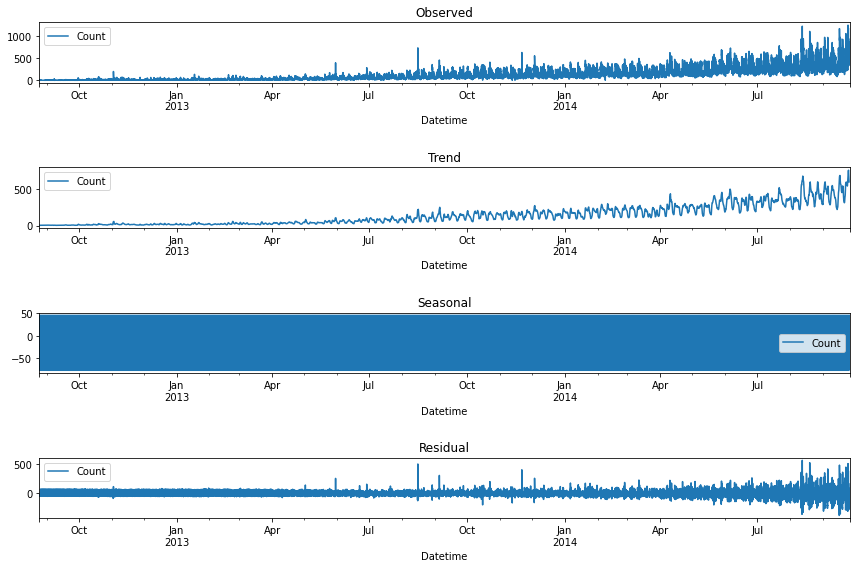

In [ ]:
# salvar a decomposicao em result
result = seasonal_decompose(df_trem)

# plotar a decomposicao em tamanho normal
#result.plot();

# plotar a decomposição em tamanho customizado maior
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
ax1.set_title("Observed")
result.observed.plot(ax=ax1)
ax2.set_title("\nTrend")
result.trend.plot(ax=ax2)
ax3.set_title("\nSeasonal")
result.seasonal.plot(ax=ax3)
ax4.set_title("\nResidual")
result.resid.plot(ax=ax4)
plt.tight_layout()


**Hipóteses:**
* Pessoas viajam mais durante a semana.
* Há horários de pico por conta de idas e vindas ao trabalho.
* Há períodos do ano onde a demanda por transporte é maior.

In [ ]:
# importando novamente para criar as variáveis abaixo

ferroviaria_dataset = "https://raw.githubusercontent.com/inaepmachado/DataSet/master/trem.csv"

# importar os dados da empresa ferroviária
df_trem = pd.read_csv(ferroviaria_dataset)

# converter a coluna Datetime em tipo datetime; 
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

# criar features para cada período da data, decompondo a variável Datetime
df_trem['year'] = df_trem.Datetime.dt.year
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day'] = df_trem.Datetime.dt.day
df_trem['hour'] = df_trem.Datetime.dt.hour
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

In [ ]:
# verificar as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


* Pessoas viajam mais durante a semana

In [ ]:
# converter as variáveis em 0 ou 1
df_trem['weekend'] = 0

# se a coluna day_of_week in (5 - sábado, 6 - domingo) então a coluna 'weekend' = 1
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), 'weekend'] = 1

In [ ]:
# verificar as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [ ]:
df_trem.tail()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0


In [ ]:
# verificar os valores final de semana x semana
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

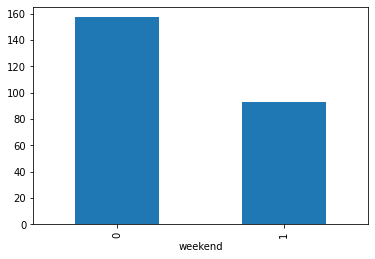

In [ ]:
# plotar os valores final de semana x semana
df_trem.groupby('weekend').Count.mean().plot.bar();

* Há horários de pico por conta de idas e vindas ao trabalho.

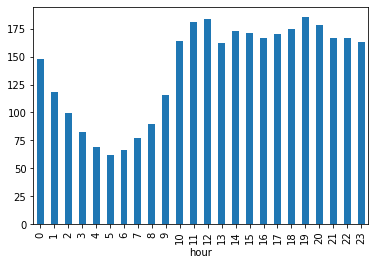

In [ ]:
# plotar os valores em função do horário
df_trem.groupby('hour').Count.mean().plot.bar();

* Há períodos do ano onde a demanda por transporte é maior.

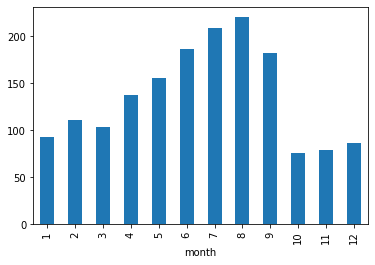

In [ ]:
# plotar os valores em função dos meses
df_trem.groupby('month').Count.mean().plot.bar();